In [1]:
import numpy as np
import scipy as sp
from importlib import reload
import neuraltda.topology2 as tp2
import glob
import os
import pickle
import matplotlib.pyplot as plt
import h5py as h5
%matplotlib inline

import seaborn as sns
import pandas as pd
from neuraltda import TPLCP
from neuraltda import FRLCP
reload(TPLCP)

import datetime
daystr = datetime.datetime.now().strftime('%Y%m%d')
figsavepth = '/home/brad/DailyLog/'+daystr+'/'
print(figsavepth)

/home/brad/DailyLog/20170912/


/home/brad/.conda/envs/neuraltda-3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
block_path = '/home/brad/krista/B1075/P01S03/'
block_path = '/home/brad/krista/B1083/P03S03/'
bdf = glob.glob('/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-fulltrial/20170626T223014Z-10.0-5.0.binned')[0]

birds = ['B1083', 'B1075', 'B1235', 'B1056']
#birds = ['B1075']

bps = {'B1083': '/home/brad/krista/B1083/P03S03/', 'B1075': '/home/brad/krista/B1075/P01S03/',
       'B1235': '/home/brad/krista/B1235/P02S01/', 'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/'}

# Stim classes
B1083_classes = {'M_40k': 'R', 'N_40k':'L', 'O_40k':'R', 'P_40k':'L'}
B1075_classes = {'E_40k': 'R', 'F_40k':'L', 'G_40k':'R', 'H_40k':'L'}
B1087_classes = {'M_40k': 'R', 'N_40k':'L', 'O_40k':'R', 'P_40k':'L'}
B1235_classes = {'E_scaled_burung': 'R', 'F_scaled_burung':'L', 'G_scaled_burung':'R', 'H_scaled_burung':'L'}
B1056_classes = {'A_scaled_burung': 'R', 'B_scaled_burung':'L', 'C_scaled_burung':'R', 'D_scaled_burung':'L'}

stims = ['M_40k', 'N_40k', 'O_40k', 'P_40k']
B1083_stims = ['M_40k', 'N_40k', 'O_40k', 'P_40k']
B1075_stims = ['E_40k', 'F_40k', 'G_40k', 'H_40k']
B1235_stims = ['E_scaled_burung', 'F_scaled_burung', 'G_scaled_burung', 'H_scaled_burung']
B1056_stims = ['A_scaled_burung', 'B_scaled_burung', 'C_scaled_burung', 'D_scaled_burung']

stim_classes = {'B1083': B1083_classes, 'B1075': B1075_classes,
                'B1235': B1235_classes, 'B1056': B1056_classes}
bird_stims = {'B1083': B1083_stims, 'B1075': B1075_stims,
              'B1235': B1235_stims, 'B1056': B1056_stims}

In [8]:
# parameters
reload(tp2)
analysis_id = 'test2'
thresh = 4.0
nperms = 20

ncellsperm = 30
dims = [0,1,2,3,4]
Ntimes = 10
twin = np.linspace(0, 6000, Ntimes)
p_test = 0.2
N_tests = 60
winsize = 10.0
dtovr = winsize*0.5
comment = 'ForLogisticPred'
segment_info = [0,0]


In [6]:
datapth = '/home/brad/DailyLog/20170912'

with open(os.path.join(datapth, 'acframe_behavioralclass.pkl'), 'rb') as f:
    acframe_behavioralclass = pickle.load(f)
    
with open(os.path.join(datapth, 'acframe_stimulusID.pkl'), 'rb') as f:
    acframe_stimulusID = pickle.load(f)
    
with open(os.path.join(datapth, 'acframe_arbunf.pkl'), 'rb') as f:
    acframe_arbunf = pickle.load(f)

/home/brad/DailyLog/20170912/10.0-5.0-4.0-20-30-10-0.2-60-ShuffleClassLabels-stripplot.eps


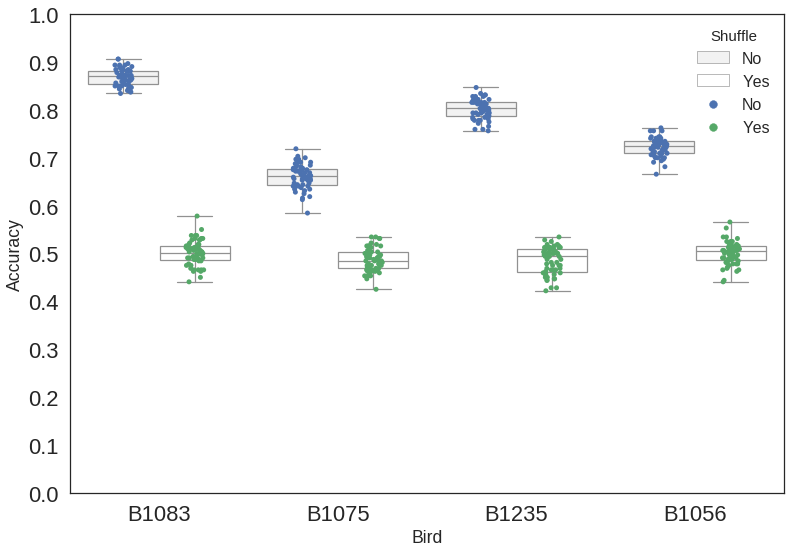

In [14]:
#stripplot
name = 'ShuffleClassLabels-stripplot'
sns.set_context('poster')
sns.set_style('white')
plt.figure()
sns.stripplot(x='Bird', y='Accuracy', hue='Shuffle', data=acframe_behavioralclass,
              jitter=True, split=True)
sns.boxplot(x='Bird', y='Accuracy', hue='Shuffle', data=acframe_behavioralclass, color='white',
            linewidth=1.25, whis=100)
ax = plt.gca()
ax.tick_params(labelsize=22)

plt.yticks([x/10 for x in range(11)])
#plt.ylim([0.3, 1])
figpath = os.path.join(figsavepth, '{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))
print(figpath)
plt.savefig(figpath, bbox_inches='tight')

/home/brad/DailyLog/20170912/10.0-5.0-4.0-20-30-10-0.2-60-PredictStimID-stripplot.eps


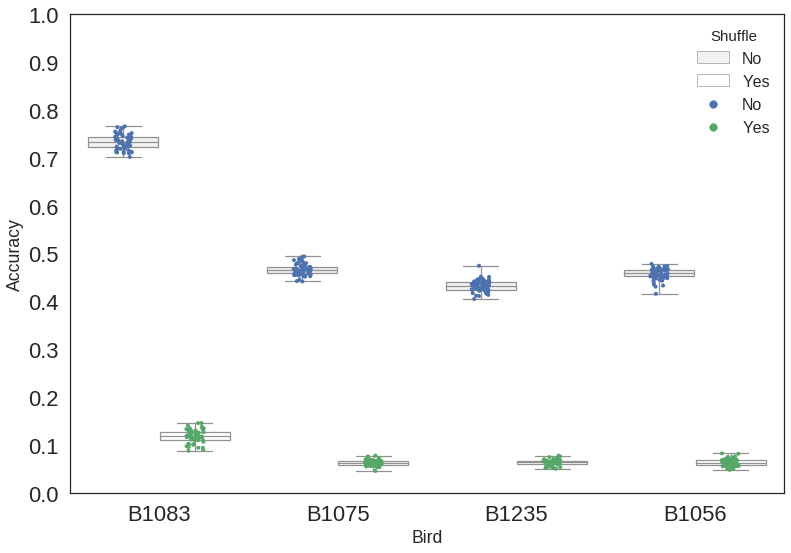

In [15]:
#stripplot
name = 'PredictStimID-stripplot'
sns.set_context('poster')
sns.set_style('white')
plt.figure()
sns.stripplot(x='Bird', y='Accuracy', hue='Shuffle', data=acframe_stimulusID,
              jitter=True, split=True, size=4)
sns.boxplot(x='Bird', y='Accuracy', hue='Shuffle', data=acframe_stimulusID, color='white',
            linewidth=1.25, whis=100)
ax = plt.gca()
ax.tick_params(labelsize=22)
plt.yticks([x/10 for x in range(11)])
#plt.ylim([0.3, 1])

figpath = os.path.join(figsavepth, '{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))
print(figpath)
plt.savefig(figpath, bbox_inches='tight')

/home/brad/DailyLog/20170912/10.0-5.0-4.0-20-30-10-0.2-60-UnfvFam-stripplot.eps


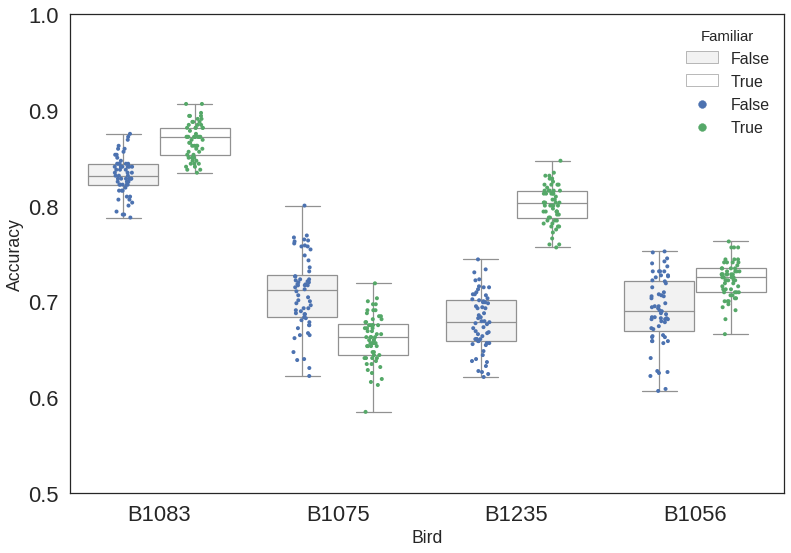

In [16]:
# plot familiar vs. unfamiliar
acframe_arbunf['Familiar'] = len(acframe_arbunf)*[False]
acframe_behavioralclass['Familiar'] = len(acframe_behavioralclass)*[True]

acframe_fam_unf = acframe_arbunf.append(acframe_behavioralclass)
#stripplot
name = 'UnfvFam-stripplot'
sns.set_context('poster')
sns.set_style('white')
plt.figure()
sns.stripplot(x='Bird', y='Accuracy', hue='Familiar', data=acframe_fam_unf[acframe_fam_unf['Shuffle']=='No'],
              jitter=True, split=True, size=4)
sns.boxplot(x='Bird', y='Accuracy', hue='Familiar', data=acframe_fam_unf[acframe_fam_unf['Shuffle']=='No'], color='white',
            linewidth=1.25, whis=100)
plt.ylim([0.5, 1.0])
ax = plt.gca()
ax.tick_params(labelsize=22)

#plt.yticks([x/10 for x in range(11)])
#plt.ylim([0.3, 1])
#plt.savefig('/home/brad/DailyLog/20170831/{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))

figpath = os.path.join(figsavepth, '{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))
print(figpath)
plt.savefig(figpath, bbox_inches='tight')

In [ ]:
acframe_FRTop = acframe_fam_unf[(acframe_fam_unf['Familiar']==True) & (acframe_fam_unf['Shuffle'] == 'No')]
acframe_FRTop['Type'] = pd.Series(len(acframe_FRTop)*['Top'], index=acframe_FRTop.index)
acframe_FRTop = acframe_FRTop.append(acframe_FR[acframe_FR['Shuffle'] == 'No'])

In [ ]:
#stripplot
name = 'FRvsTop-stripplot'
sns.set_context('poster')
sns.set_style('white')
plt.figure()
sns.stripplot(x='Bird', y='Accuracy', hue='Type', data=acframe_FRTop,
              jitter=True, split=True, size=4)
sns.boxplot(x='Bird', y='Accuracy', hue='Type', data=acframe_FRTop, color='white',
            linewidth=1.25, whis=100)
plt.ylim([0.5, 1.0])
plt.plot()
ax = plt.gca()
ax.tick_params(labelsize=20)

#plt.yticks([x/10 for x in range(11)])
#plt.ylim([0.3, 1])
#plt.savefig('/home/brad/DailyLog/20170831/{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))

figpath = os.path.join(figsavepth, '{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))
print(figpath)
plt.savefig(figpath, bbox_inches='tight')